<a href="https://colab.research.google.com/github/fboldt/aulasml/blob/master/aula5a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

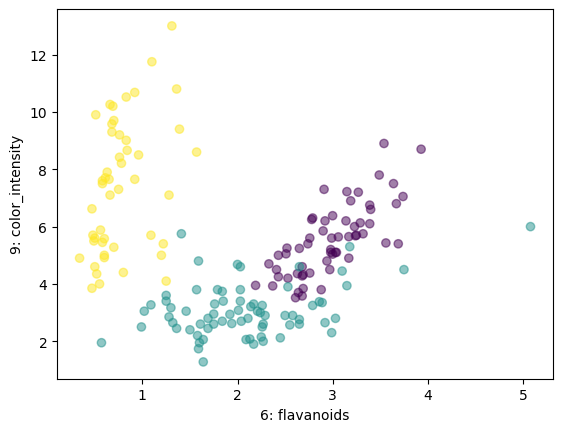

In [2]:
import matplotlib.pyplot as plt
i, j = 6, 9
Xtmp = X[:, [i, j]]
plt.scatter(Xtmp[:, 0], Xtmp[:, 1], c=y, alpha=0.5)
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
plt.show()

In [7]:
import numpy as np
from numpy.linalg import pinv
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report, confusion_matrix, \
ConfusionMatrixDisplay, precision_recall_curve, PrecisionRecallDisplay

def addBias(X):
  return np.hstack((np.ones((X.shape[0], 1)), X))

class ClassificadorLinear(BaseEstimator, ClassifierMixin):
  def __init__(self):
    self.threshold = 0.5

  def fit(self, X, y):
    X = addBias(X)
    self.labels_ = np.unique(y)
    yhot = np.zeros((y.shape[0], len(self.labels_)))
    for i, label in enumerate(self.labels_):
      yhot[:, i] = (y == label).astype(int)
    self.w = pinv(X) @ yhot

  def predict(self, X):
    X = addBias(X)
    ypred = X @ self.w
    ypred = np.argmax(ypred, axis=1)
    ypred = np.array([self.labels_[i] for i in ypred])
    return ypred

clf = ClassificadorLinear()
clf.fit(Xtmp, y)
y_pred = clf.predict(Xtmp)

In [9]:
clf.w

array([[-0.63422328,  1.23765963,  0.39656365],
       [ 0.34020439, -0.03930149, -0.3009029 ],
       [ 0.05443112, -0.15006256,  0.09563144]])

In [20]:
def defineAxes(X):
    offset = 0.1
    min1, max1 = X[:, 0].min(), X[:, 0].max()
    min2, max2 = X[:, 1].min(), X[:, 1].max()
    return [min1-offset, max1+offset, min2-offset, max2+offset]

def plotPredictions(clf, X):
    axes = defineAxes(X)
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)

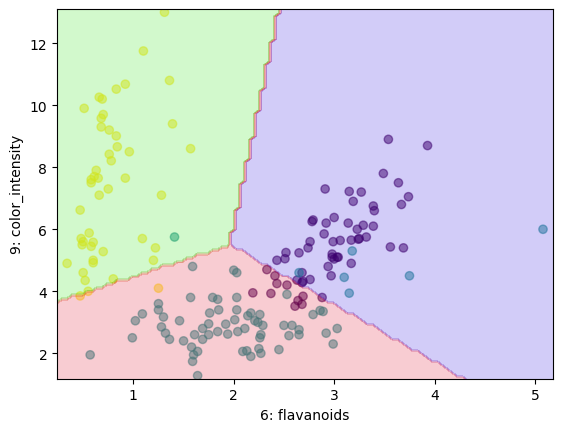

In [23]:
plt.scatter(Xtmp[:, 0], Xtmp[:, 1], c=y, alpha=0.5)
colors = ['green', 'blue', 'red']
plotPredictions(clf, Xtmp)
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
plt.show()


In [15]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        59
           1       0.82      0.90      0.86        71
           2       0.98      0.94      0.96        48

    accuracy                           0.88       178
   macro avg       0.90      0.88      0.89       178
weighted avg       0.89      0.88      0.88       178



In [45]:
clf = ClassificadorLinear()
clf.fit(X, y)
y_pred = clf.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        48

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [49]:
from sklearn.model_selection import cross_validate
scores = cross_validate(clf, X, y, cv=5)
scores['test_score'], np.mean(scores['test_score'])

(array([0.97222222, 1.        , 0.97222222, 0.97142857, 0.97142857]),
 0.9774603174603176)